<a href="https://colab.research.google.com/github/SuperNZH/Deep-Learning-Practice/blob/main/Dive%20in%20DL/linear_regression_inHand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

# 定义人工数据

In [2]:
# 人工构造一个数据集

num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

print(features.shape)
print(labels.shape)

torch.Size([1000, 2])
torch.Size([1000])


In [3]:
def use_svg_display():
  display.set_matplotlib_formats('svg')

def set_figsize(figsize = (4.5,3.5)):
  use_svg_display()
  plt.rcParams['figure.figsize'] = figsize

set_figsize()

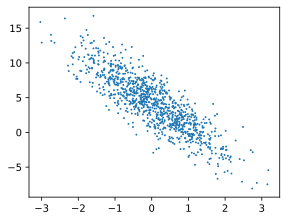

In [4]:
plt.scatter(features[:,1].numpy(), labels.numpy(), 1)# 这个是size of point

In [5]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices) # 样本的读取要随机
  for i in range(0, num_examples, batch_size):
    j = torch.LongTensor(indices[i:min(i + batch_size, num_examples)])
    yield features.index_select(0,j), labels.index_select(0,j) # (dim,index)

In [6]:
batch_size = 10
for X, y in data_iter(batch_size,features,labels):
  print(X, y)
  break

tensor([[-0.2765,  0.8414],
        [-2.1606,  1.0018],
        [-0.1564,  0.3527],
        [-0.8994, -0.0360],
        [ 1.4887,  1.5656],
        [-1.7061,  1.5720],
        [ 0.9848,  0.0833],
        [-0.5769,  0.7849],
        [-0.8206, -0.4925],
        [-0.4714,  1.4903]]) tensor([ 0.7778, -3.5377,  2.6840,  2.5153,  1.8590, -4.5694,  5.8934,  0.3779,
         4.2224, -1.8024])


In [7]:
# 初始化模型的参数
w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [8]:
# 需要打开这个func来开启更新迭代过来的参数
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

# 定义模型

In [9]:
# def linreg(X,w,b):
#   return torch.mm(X,w) + b
# # y = w1*x1 + w2*x2 + b


def linreg(X, w, b): # 本函数已保存在d2lzh_pytorch包中⽅便以后使⽤
 return torch.mm(X, w) + b

In [10]:
# 损失函数
def squared_loss(y_hat,y):
  return (y_hat - y.view(y_hat.size())) ** 2 / 2
  # view就是numpy的reshape

In [13]:
# 优化算法

def sgd(params,lr,batch_size):
  for param in params:
    param.data -= lr * param.grad/batch_size


In [14]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X,y in data_iter(batch_size,features,labels):
    l = loss(net(X, w, b), y).sum()
    l.backward()
    sgd([w,b], lr,batch_size)

    w.grad.data.zero_()
    b.grad.data.zero_()

  train_l = loss(net(features,w,b), labels)
  print('epoch %d, loss %f' %(epoch + 1, train_l.mean().item()))


epoch 1, loss 0.037706
epoch 2, loss 0.000143
epoch 3, loss 0.000049


In [15]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 2.0004],
        [-3.3998]], requires_grad=True)
4.2 
 tensor([4.1995], requires_grad=True)
